<a href="https://colab.research.google.com/github/shubhamk2001/Deep-Learning-Basics/blob/main/Keras_Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
# from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [ ]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

In [ ]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [ ]:
y_train[8]

1

In [ ]:
X_train[8].shape

(28, 28)

In [ ]:
X_train[8].shape

(28, 28)

In [ ]:
28*28

784

Train label --------------------->>> 0


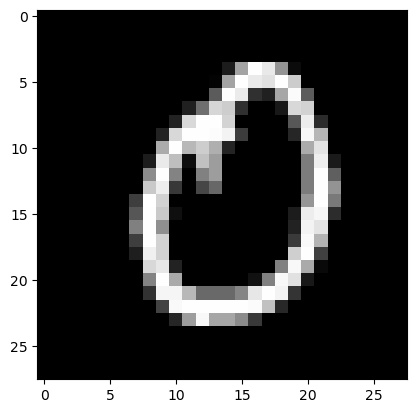

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 118
print("Train label --------------------->>>",y_train[sample])
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


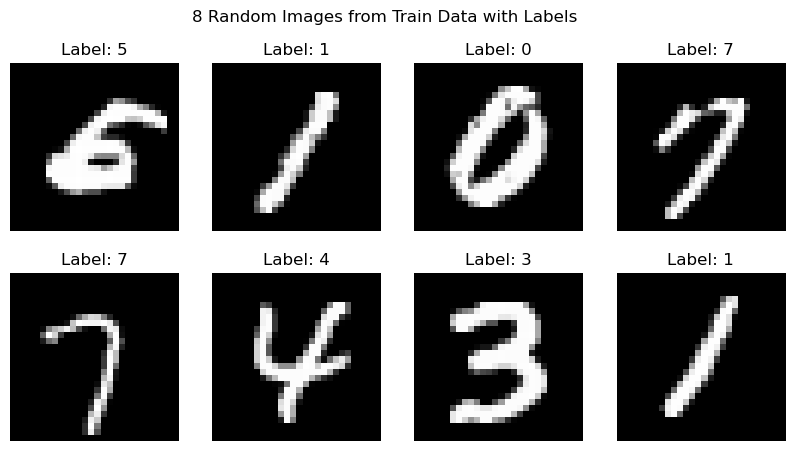

In [ ]:
# prompt: use the above code to plot 8 random images from train data along with it's actual label

import matplotlib.pyplot as plt
import random

# Select 8 random indices from the training set
random_indices = random.sample(range(len(X_train)), 8)

# Plot the images and their corresponding labels
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, index in enumerate(random_indices):
    ax = axes[i // 4, i % 4]
    ax.imshow(X_train[index], cmap="gray")
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis("off")

plt.suptitle("8 Random Images from Train Data with Labels")
plt.show()


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
import numpy as np
np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Model Parameters
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
(X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))).shape

(60000, 784)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255 #max scaling
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [ ]:
y_train[10]


3

In [ ]:
# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [ ]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
# 1 -> 10
# 0 - One column
# 1 - Another column
# 2 -> Another column

In [ ]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Build neural network
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


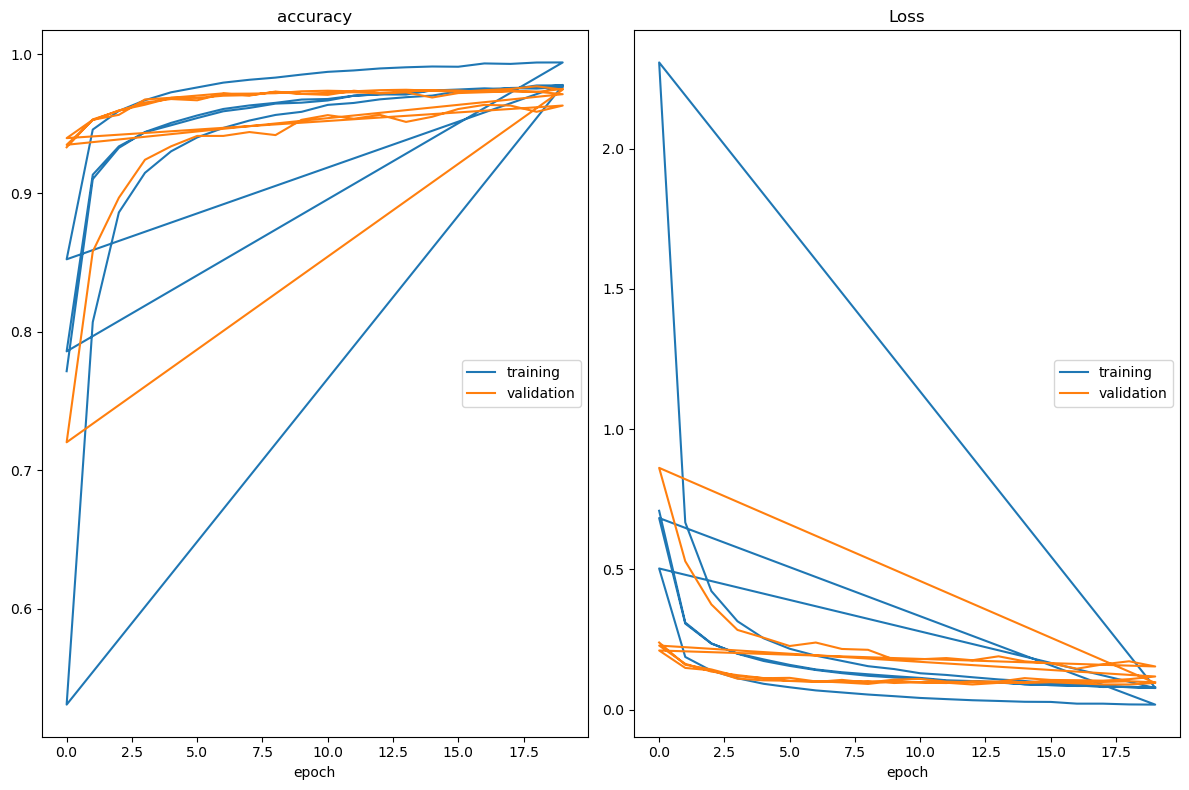

accuracy
	training         	 (min:    0.531, max:    0.994, cur:    0.977)
	validation       	 (min:    0.720, max:    0.977, cur:    0.975)
Loss
	training         	 (min:    0.018, max:    2.307, cur:    0.078)
	validation       	 (min:    0.089, max:    0.862, cur:    0.097)
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9764 - loss: 0.0789 - val_accuracy: 0.9751 - val_loss: 0.0971


In [ ]:

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=20,
          callbacks=[plot_losses],#plot losses and accuracy in live graph
          verbose=1,
          validation_data=(X_test, y_test))


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09707993268966675
Test accuracy: 0.9750999808311462


In [ ]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step


In [ ]:
predictions.shape

(10000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
predictions[15].max()

0.999538

In [ ]:
for idx,i in enumerate(predictions[15]):
    if i == predictions[15].max():
        print(idx)


5


In [ ]:
y_test[15]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Test label --------------------->>> 5


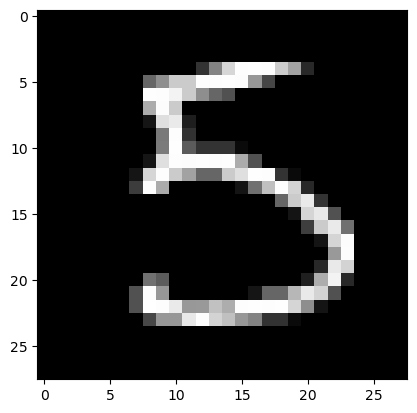

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 15
print("Test label --------------------->>>",y_test[sample])
image = X_test[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
